<a href="https://colab.research.google.com/github/madhurimaha/beyondthelabel-Data-Science-Project/blob/main/goodonyou/goodonyou_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd

# Load the CSV file
csv_file = "data_final.csv"  # Replace with your CSV file path
df = pd.read_csv("/content/drive/MyDrive/FDS project/Good On You/data_final.csv")

# Remove the "Rated:" prefix from the "Brand Rating" column
df['Brand Rating'] = df['Brand Rating'].str.replace('Rated: ', '')


output_csv = "cleaned_data.csv"
df.to_csv(output_csv, index=False)

print("Data cleaned and saved to", output_csv)


Data cleaned and saved to cleaned_data.csv


In [3]:
df["Brand Rating"].unique()

array(['Not good enough', "It's a start", 'Good', 'We avoid', nan],
      dtype=object)

In [4]:
df.shape

(250, 2)

In [5]:
df.head()

,Company Name,Brand Rating
0,Primark,Not good enough
1,Converse,It's a start
2,Gucci,It's a start
3,Puma,Good
4,Zara,Not good enough


In [6]:
nan_count = df.isna().sum()

# Print the counts
print("Number of NaN values in each column:")
print(nan_count)


Number of NaN values in each column:
Company Name     0
Brand Rating    32
dtype: int64


In [7]:
null_values = df[df.isnull()]
print(null_values)

    Company Name Brand Rating
0            NaN          NaN
1            NaN          NaN
2            NaN          NaN
3            NaN          NaN
4            NaN          NaN
..           ...          ...
245          NaN          NaN
246          NaN          NaN
247          NaN          NaN
248          NaN          NaN
249          NaN          NaN

[250 rows x 2 columns]


In [8]:
df = df.dropna()
print(df.shape)

(218, 2)


In [9]:
df["Brand Rating"].unique()

array(['Not good enough', "It's a start", 'Good', 'We avoid'],
      dtype=object)

In [10]:
df_end = df.copy()

In [11]:
# Mapping dictionary
rating_mapping = {
    'We avoid': 0,
    'Not good enough': 1,
    "It's a start": 2,
    'Good': 3,
}

# Replace ratings with numeric values
df_end['Brand Rating'] = df_end['Brand Rating'].map(rating_mapping)

In [12]:
df_end.head()

,Company Name,Brand Rating
0,Primark,1
1,Converse,2
2,Gucci,2
3,Puma,3
4,Zara,1


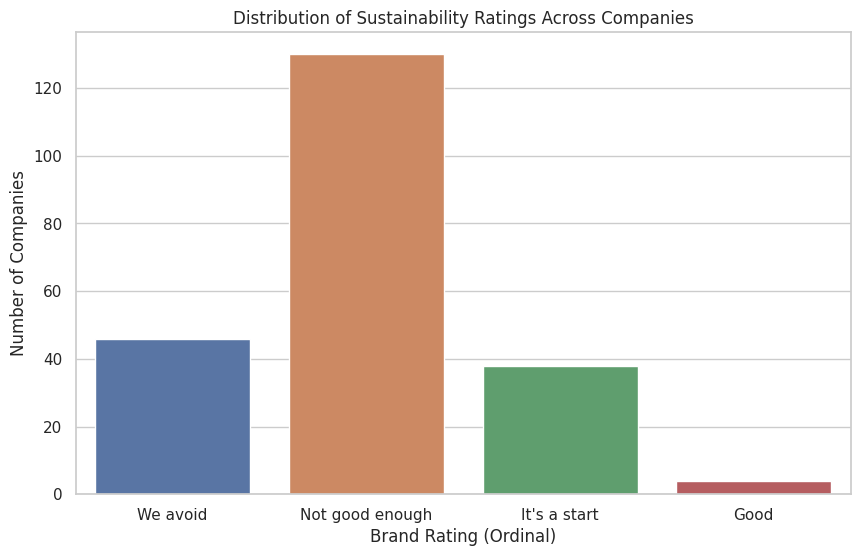

(array(['Puma', 'Patagonia Inc.', 'The Timberland Company',
        'The North Face Inc.'], dtype=object),
 array(['Sports Direct', 'Joe Fresh', 'DKNY', 'Heilan Home', 'Semir',
        'Eddie Bauer', 'New Yorker', 'Max Mara', 'Fabletics', 'Youngor',
        'Caroll', 'Marni', 'Jil Sander', 'Furla', 'Fashion Nova',
        'BCBGMAXAZRIA', 'Nine West', 'Mexx', 'K-Way', 'Pepe Jeans',
        'Longchamp', 'REVOLVE', 'Shein', 'AJIO', 'Romwe', 'Savage X Fenty',
        'Belle International Holdings', 'Warehouse Group',
        'Quiksilver Inc', 'Skechers USA Inc', 'Jockey International Inc',
        'Aeropostale Inc.', 'Triumph International', 'Express Inc',
        'Buckle Inc', 'Anta Sports Products', 'Reebok International Ltd.',
        'Celio International', 'Deichmann SE', '"Dillard\'s, Inc."',
        '"Lands\' End, Inc."', 'Tom Ford International LLC',
        "Chico's FAS Inc", 'Dolce & Gabbana', 'Big Bazaar',
        'Tory Burch LLC'], dtype=object))

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Analysis 1: Distribution of ratings across all companies
plt.figure(figsize=(10, 6))
sns.countplot(data=df_end, x='Brand Rating')
plt.title('Distribution of Sustainability Ratings Across Companies')
plt.xlabel('Brand Rating (Ordinal)')
plt.ylabel('Number of Companies')
plt.xticks(ticks=[0, 1, 2, 3], labels=['We avoid', 'Not good enough', "It's a start", 'Good'])
plt.show()

# Analysis 2: Top-rated and lowest-rated companies
top_rated = df_end[df_end['Brand Rating'] ==df_end['Brand Rating'].max()]['Company Name'].unique()
lowest_rated = df_end[df_end['Brand Rating'] == df_end['Brand Rating'].min()]['Company Name'].unique()

# Display results
top_rated, lowest_rated
